## Question: You have to forecast the sales for 2 years using below mentioned methods:

## i) HW Method

## ii) ARIMA Method

## Loading necessary Libraries


In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import itertools
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error
from math import sqrt


from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

from statsmodels.tsa.stattools import adfuller     # for ACF, PACF

# loading libraries for arima model
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

Predefine plotting styles
It groups together all of them and predefine all the settigs for plots


In [2]:
plt.style.use("fivethirtyeight")
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'


In [3]:
B=pd.read_csv("beer.csv")
B.head()

,OzBeer
0,284.4
1,212.8
2,226.9
3,308.4
4,262.0


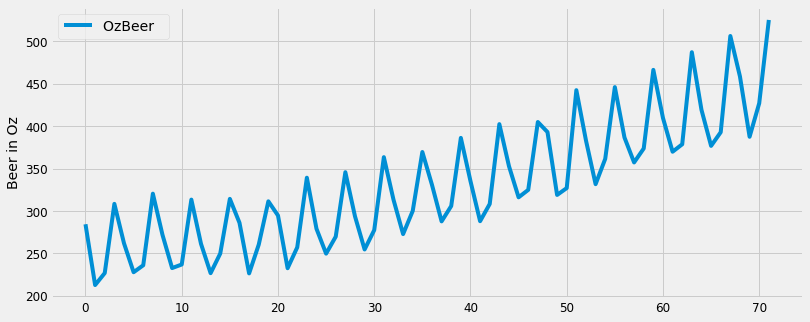

In [5]:
# Plot the time-series
B.plot(figsize=(12,5))

plt.ylabel('Beer in Oz')
plt.show()


In [7]:
B.shape

(72, 1)

In [91]:
# Creating training and test data
train=B[:60]
test=B[60:]
pred= B[60:]

In [26]:
#triple Exponential Method
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [92]:
#fitting model
model=ExponentialSmoothing(np.asarray(train['OzBeer  ']),trend='mul',
                                          seasonal='mul',seasonal_periods=12).fit(optimized=True)
pred['Holt_Winters']=model.forecast(len(test))

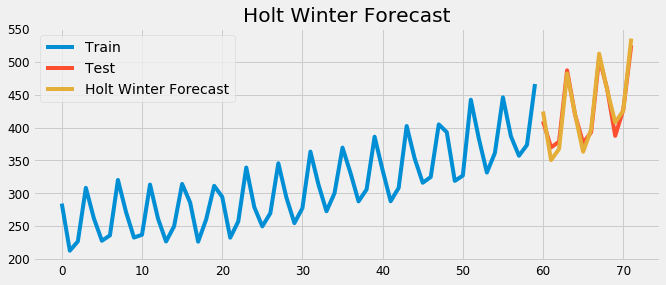

In [93]:
#Plotting
plt.figure(figsize=(10,4))
plt.plot(train.index, train['OzBeer  '],label='Train')
plt.plot(test.index, test['OzBeer  '],label='Test')
plt.plot(pred.index, pred['Holt_Winters'], label='Holt Winter Forecast')
plt.legend(loc='best')
plt.title('Holt Winter Forecast')
plt.show()

In [94]:
print(model.params)


{'smoothing_level': 0.4736845974228242, 'smoothing_slope': 0.47368421052631576, 'smoothing_seasonal': 0.26315770128858784, 'damping_slope': nan, 'initial_level': 309.7400654939084, 'initial_slope': 0.9367365928270263, 'initial_seasons': array([0.88913983, 0.68236664, 0.73908052, 1.00385892, 0.86405258,
       0.7440257 , 0.78232296, 1.01969103, 0.88517344, 0.76294297,
       0.77844102, 1.00250489]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [95]:
# Computing the Root Mean square Error (RMSE)

holt_winter_rmse = sqrt(mean_squared_error(test["OzBeer  "],pred["Holt_Winters"]))
print("RMSE using Holt Winter Forecasting : ",holt_winter_rmse)

RMSE using Holt Winter Forecasting :  11.218956310079149


## Prediction

In [156]:
pred_hw= pd.DataFrame(index=np.arange(72,96))

In [157]:
pred_hw.head()

""
72
73
74
75
76


In [158]:
#fitting model
model=ExponentialSmoothing(np.asarray(B['OzBeer  ']),trend='mul',
                                          seasonal='mul',seasonal_periods=12).fit(optimized=True)
pred_hw['Holt_Winters']=model.forecast(len(pred_hw))

print(pred_hw.head())

    Holt_Winters
72    486.650470
73    421.613188
74    440.246250
75    576.916257
76    500.721638


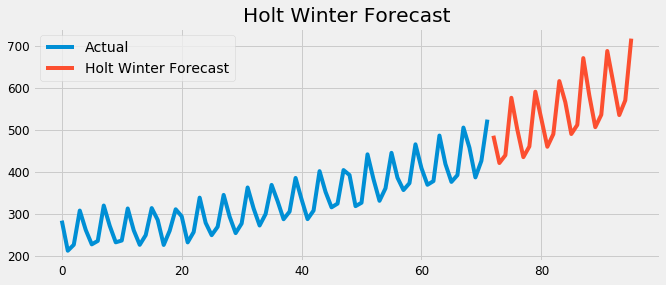

In [159]:
plt.figure(figsize=(10,4))
plt.plot(B.index, B['OzBeer  '],label='Actual')
plt.plot(pred_hw.index, pred_hw['Holt_Winters'], label='Holt Winter Forecast')
plt.legend(loc='best')
plt.title('Holt Winter Forecast')
plt.show()

### (ii) ARIMA Method

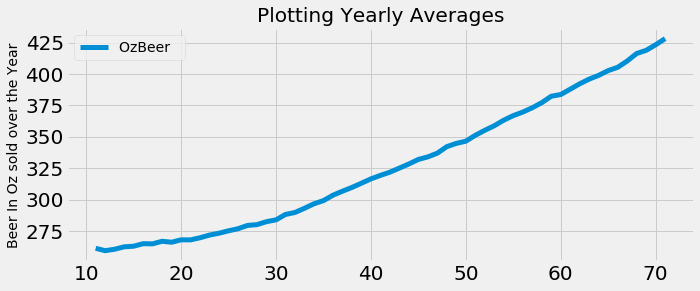

In [36]:
#Identifying trend in data
Beer=B[['OzBeer  ']]
Beer.rolling(12).mean().plot(figsize=(10,4),linewidth=5,fontsize=20)
plt.ylabel('Beer In Oz sold over the Year')
plt.title('Plotting Yearly Averages')
plt.legend()
#this is the trend estimated in the moving averages
#Since the average is increasing, there is trend

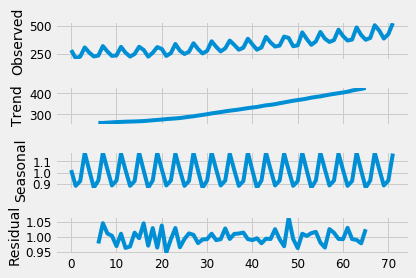

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6     260.208333
7     259.833333
8     261.375000
9     262.579167
10    263.829167
11    264.775000
12    265.729167
13    266.366667
14    266.941667
15    267.883333
16    268.716667
17    270.633333
18    272.445833
19    274.141667
20    275.929167
21    278.066667
22    279.695833
23    281.191667
24    283.079167
25    285.958333
26    288.904167
27    291.358333
28    294.820833
29    297.870833
         ...    
42    339.508333
43    343.395833
44    345.570833
45    348.791667
46    353.129167
47    356.941667
48    360.970833
49    365.000000
50    368.225000
51    371.345833
52    375.087500
53    379.675000
54    382.925000
55    385.737500
56    390.008333
57    394.020833
58    397.387500
59    400.770833
60    403.958333
61    407.775000
62    413.275000
63    417.525000
64    421.004167
65    425.675000
66           NaN
67           NaN
68           NaN
69           N

In [45]:
#multiplicative because variance is increasing
#=trend*seasonality+Stationary series
s=sm.tsa.seasonal_decompose(Beer["OzBeer  "],model="multiplicative",freq=12)
fig=s.plot()
plt.show()
s.resid
s.seasonal
s.trend
#Here in 2nd graph first 12 and last 12 are trucated...as rolling

In [47]:
# Creating training and test data
train1=Beer[:72]
test1=Beer[60:]

In [58]:
result=adfuller(train1['OzBeer  '],autolag='AIC')
print('ADF Static : %f'%result[0])
print('p-value : %f'% result[1])
print('AIC : %f'%result[5])
print('Critical Values : ')
for key,value in result[4].items():
    print('\t%s : %3f'%(key,value))
#high p-value means data is not stationary

ADF Static : 3.348053
p-value : 1.000000
AIC : 449.459568
Critical Values : 
	1% : -3.538695
	5% : -2.908645
	10% : -2.591897


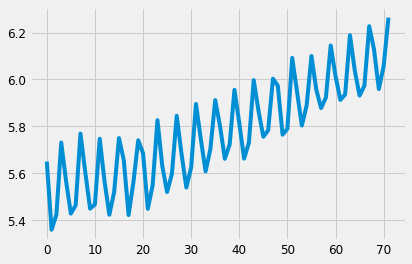

In [59]:
#Taking log to stabalize the increasing variance, VARIANCE STABLIZATION
log_train=np.log(train1['OzBeer  '])
plt.plot(log_train)

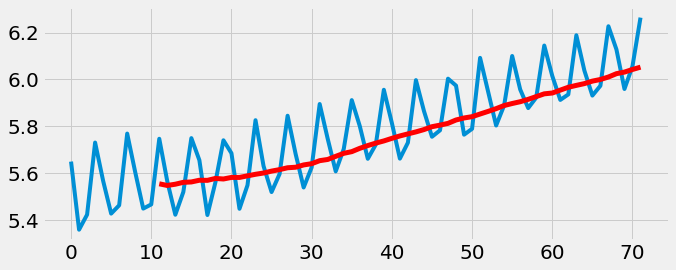

In [60]:
#Moving aveage plot along with the log of data
plt.plot(log_train)
moving_avg=log_train.rolling(12).mean().plot(figsize=(10,4),linewidth=5,fontsize=20,color='red')

In [61]:
result=adfuller(log_train,autolag='AIC')
print('ADF Static : %f'%result[0])
print('p-value : %f'% result[1])
print('AIC : %f'%result[5])
print('Critical Values : ')
for key,value in result[4].items():
    print('\t%s : %3f'%(key,value))
#high p-value means data is not stationary

ADF Static : 2.359706
p-value : 0.998990
AIC : -235.751704
Critical Values : 
	1% : -3.538695
	5% : -2.908645
	10% : -2.591897


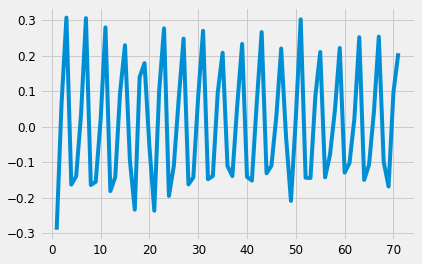

In [62]:
#After differenting, observe plot
log_train_diff=log_train-log_train.shift()
plt.plot(log_train_diff)

In [63]:
#wont work because of nan
log_train_diff.head()
#First value is nan...which produces all incorrect further values, so we drop nan again see

0         NaN
1   -0.290029
2    0.064157
3    0.306888
4   -0.163053
Name: OzBeer  , dtype: float64

In [64]:
log_train_diff.dropna(inplace=True)

In [65]:
result=adfuller(log_train_diff,autolag='AIC')
print('ADF Static : %f'%result[0])
print('p-value : %f'% result[1])
print('AIC : %f'%result[5])
print('Critical Values : ')
for key,value in result[4].items():
    print('\t%s : %3f'%(key,value))
#high p-value means data is not stationary

ADF Static : -3.248678
p-value : 0.017334
AIC : -233.571776
Critical Values : 
	1% : -3.535217
	5% : -2.907154
	10% : -2.591103


In [66]:
 # thus d= 1

In [67]:
# ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
log_acf=acf(log_train_diff, nlags=20)
log_pacf=pacf(log_train_diff, nlags=20,method='ols')

Text(0.5,1,'Autocorrelation Function')

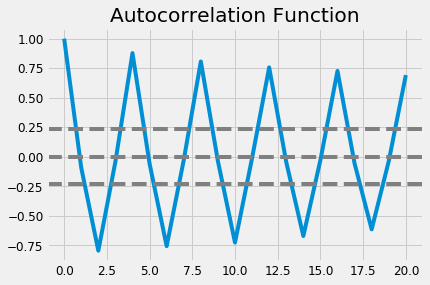

In [68]:
plt.plot(log_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(log_train_diff)),linestyle=('--'),color='gray')
plt.axhline(y=1.96/np.sqrt(len(log_train_diff)),linestyle=('--'),color='gray')
plt.title('Autocorrelation Function')

No meaning of checking our data after 5 lags as the pattern is decreasing.


Text(0.5,1,'Partial Autocorrelation Function')

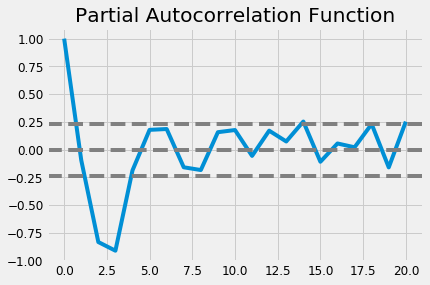

In [70]:
#q= 2, 4, 6
plt.plot(log_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(log_train_diff)),linestyle=('--'),color='gray')
plt.axhline(y=1.96/np.sqrt(len(log_train_diff)),linestyle=('--'),color='gray')
plt.title('Partial Autocorrelation Function')

In [72]:
#p= 2,3

#till now we have found
# d=1
# q=2,4,6
# p=2,3

-127.72071857341535


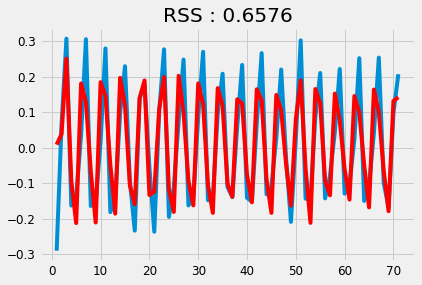

In [74]:
# AR model
model1=ARIMA(log_train,order=(2,1,0))
results_AR1=model1.fit(disp=-1)
plt.plot(log_train_diff)
plt.plot(results_AR1.fittedvalues,color='red')
plt.title('RSS : %.4f'%sum((results_AR1.fittedvalues-log_train_diff)**2))
print(results_AR1.aic)
#here data used is log_train but we are plotting log_train_diff
#becuse purpose of using log_train_diff is to find the value of d,q,p
#then we apply our modelon original data which was log_train

In [75]:
#we see that our stationary data and predicted values doesnt have high difference.
#we then move to next model

-215.83637435024417


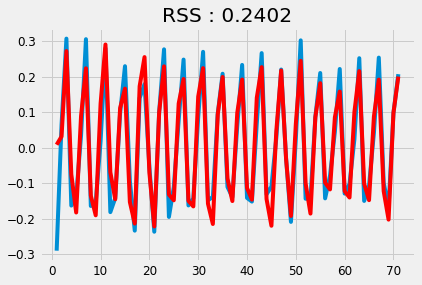

In [108]:
# ARIMA model with (p,d,q)=(2,1,2)
model2=ARIMA(log_train,order=(2,1,2))
results_AR2=model2.fit(disp=-1)
plt.plot(log_train_diff)
plt.plot(results_AR2.fittedvalues,color='red')
plt.title('RSS : %.4f'%sum((results_AR2.fittedvalues-log_train_diff)**2))
print(results_AR2.aic)
#here data used is log_train but we are plotting log_train_diff
#becuse purpose of using log_train_diff is to find the value of d,q,p
#then we apply our modelon original data which was log_train

-261.6576260156316


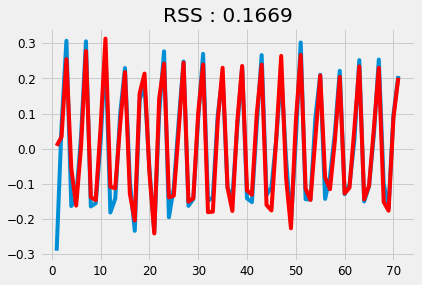

In [109]:
# ARIMA model with (p,d,q)=(3,1,2)
model3=ARIMA(log_train,order=(3,1,2))
results_AR3=model3.fit(disp=-1)
plt.plot(log_train_diff)
plt.plot(results_AR3.fittedvalues,color='red')
plt.title('RSS : %.4f'%sum((results_AR3.fittedvalues-log_train_diff)**2))
print(results_AR3.aic)
#here data used is log_train but we are plotting log_train_diff
#becuse purpose of using log_train_diff is to find the value of d,q,p
#then we apply our modelon original data which was log_train

-260.3884819919965


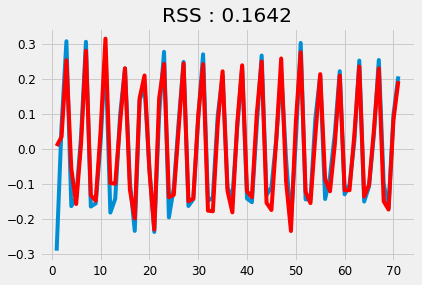

In [110]:
# ARIMA model with (p,d,q)=(3,1,4)
model4=ARIMA(log_train,order=(3,1,4))
results_AR4=model4.fit(disp=-1)
plt.plot(log_train_diff)
plt.plot(results_AR4.fittedvalues,color='red')
plt.title('RSS : %.4f'%sum((results_AR4.fittedvalues-log_train_diff)**2))
print(results_AR4.aic)
#here data used is log_train but we are plotting log_train_diff
#becuse purpose of using log_train_diff is to find the value of d,q,p
#then we apply our modelon original data which was log_train

-256.70224838634596


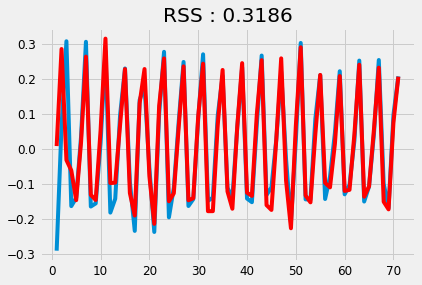

In [111]:
# ARIMA model with (p,d,q)=(3,1,6)
model5=ARIMA(log_train,order=(3,1,6))
results_AR5=model5.fit(disp=-1)
plt.plot(log_train_diff)
plt.plot(results_AR5.fittedvalues,color='red')
plt.title('RSS : %.4f'%sum((results_AR5.fittedvalues-log_train_diff)**2))
print(results_AR5.aic)
#here data used is log_train but we are plotting log_train_diff
#becuse purpose of using log_train_diff is to find the value of d,q,p
#then we apply our modelon original data which was log_train

## For Model 3

In [210]:
predictions_ARIMA_diff=pd.Series(results_AR3.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

1    0.008220
2    0.033770
3    0.254462
4   -0.056206
5   -0.161846
dtype: float64

In [211]:
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

1    0.008220
2    0.041990
3    0.296451
4    0.240245
5    0.078400
dtype: float64

In [212]:
predictions_ARIMA_log=pd.Series(log_train.ix[0], index=log_train.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

0    5.650382
1    5.658601
2    5.692372
3    5.946833
4    5.890627
dtype: float64

Text(0.5,1,'RMSE : 144.8585')

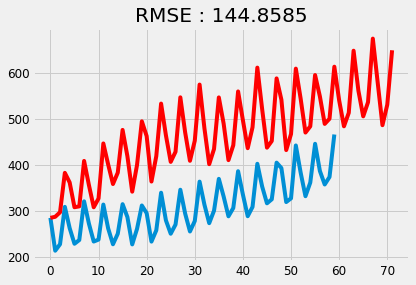

In [213]:
predictions_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(train['OzBeer  '])
plt.plot(predictions_ARIMA, color='red')
plt.title('RMSE : %.4f'%np.sqrt(np.mean((predictions_ARIMA-train['OzBeer  '])**2)))

In [214]:
results_AR3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.OzBeer     No. Observations:                   71
Model:                 ARIMA(3, 1, 2)   Log Likelihood                 137.829
Method:                       css-mle   S.D. of innovations              0.033
Date:                Thu, 24 Jan 2019   AIC                           -261.658
Time:                        12:33:39   BIC                           -245.819
Sample:                             1   HQIC                          -255.359
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0082      0.001      5.960      0.000       0.006       0.011
ar.L1.D.OzBeer      -0.8381      0.069    -12.120      0.000      -0.974      -0.703
ar.L2.D.OzBeer      -1.0037      0.009   -111.274      0.000      -1.021      -0.986
ar.L3.D.OzBeer      -0.8274      0.068    -12.125      0.000      -0.961      -0.694
ma.L1.D.OzBeer      -0.2577      0.107     -2.417      0.018      -0.467      -0.049
ma.L2.D.OzBeer       0.5529      0.135      4.082      0.000       0.287       0.818
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.0041           -1.0015j            1.0015           -0.2507
AR.2           -0.0041           +1.0015j            1.0015            0.2507
AR.3           -1.2049           -0.0000j            1.2049           -0.5000
MA.1            0.2330           -1.3245j            1.3448           -0.2223
MA.2            0.2330           +1.3245j            1.3448            0.2223
-----------------------------------------------------------------------------
"""

By Far the best model is model 3, with rmse 144 where (p,d,q) is equal to (3,1,2)

In [239]:
results_AR3.predict(start=1, end= 95)

1     0.008220
2     0.033770
3     0.254462
4    -0.056206
5    -0.161846
6     0.006168
7     0.277635
8    -0.137623
9    -0.146507
10    0.060388
11    0.312967
12   -0.108177
13   -0.112686
14    0.067245
15    0.217650
16   -0.128457
17   -0.203884
18    0.157295
19    0.213674
20   -0.067350
21   -0.240969
22    0.141482
23    0.241971
24   -0.138500
25   -0.133548
26    0.052810
27    0.244568
28   -0.150618
29   -0.141095
30    0.101811
        ...   
66    0.059200
67    0.229874
68   -0.151477
69   -0.176373
70    0.087816
71    0.201684
72   -0.097626
73   -0.173112
74    0.102099
75    0.199121
76   -0.095979
77   -0.173735
78    0.107361
79    0.193972
80   -0.096430
81   -0.172543
82    0.111074
83    0.190037
84   -0.097845
85   -0.170479
86    0.114021
87    0.186666
88   -0.099685
89   -0.167992
90    0.116573
91    0.183554
92   -0.101696
93   -0.165294
94    0.118904
95    0.180555
Length: 95, dtype: float64

In [245]:
pred_arima= pd.DataFrame()

In [246]:
pred_arima["Predict_model3"]=results_AR3.predict(start=1, end= 96)


In [247]:
pred_arima.head()

,Predict_model3
1,0.008220
2,0.033770
3,0.254462
4,-0.056206
5,-0.161846


In [248]:
predictions_ARIMA_diff1=pd.Series(pred_arima["Predict_model3"], copy=True)
predictions_ARIMA_diff1.head()

1    0.008220
2    0.033770
3    0.254462
4   -0.056206
5   -0.161846
Name: Predict_model3, dtype: float64

In [249]:
predictions_ARIMA_diff1_cumsum=predictions_ARIMA_diff1.cumsum()
predictions_ARIMA_diff1_cumsum.head()



1    0.008220
2    0.041990
3    0.296451
4    0.240245
5    0.078400
Name: Predict_model3, dtype: float64

In [250]:
predictions_ARIMA_log1=pd.Series(log_train.ix[0], index=log_train.index)
predictions_ARIMA_log1=predictions_ARIMA_log.add(predictions_ARIMA_diff1_cumsum,fill_value=0)
predictions_ARIMA_log1.head()



0    5.650382
1    5.666821
2    5.734361
3    6.243284
4    6.130872
dtype: float64

In [251]:
predictions_ARIMA1=np.exp(predictions_ARIMA_log1)


In [252]:
pred_arima["Arima_pred_transform"]=predictions_ARIMA1


In [253]:
pred_arima

,Predict_model3,Arima_pred_transform
1,0.008220,289.114031
2,0.033770,309.315356
3,0.254462,514.545715
4,-0.056206,459.837091
5,-0.161846,332.680028
6,0.006168,336.809226
7,0.277635,586.860253
8,-0.137623,445.652790
9,-0.146507,332.462424
10,0.060388,375.141065


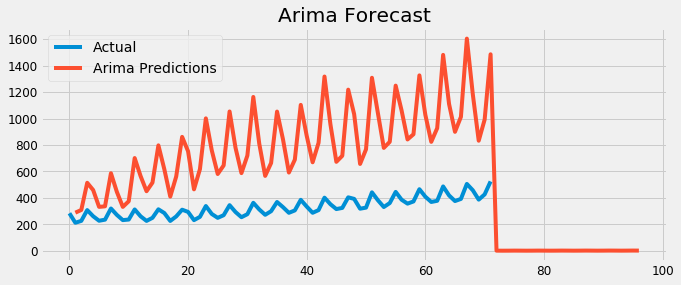

In [254]:
plt.figure(figsize=(10,4))
plt.plot(B.index, B['OzBeer  '],label='Actual')
plt.plot(pred_arima.index, pred_arima["Arima_pred_transform"], label='Arima Predictions')
plt.legend(loc='best')
plt.title('Arima Forecast')
plt.show()

The Actual values are lower from our predictions. For next two years the forcaste shows that are values will fall.